content='Here\'s a description of the content in each image:\n\n**Image 1:** This is an internet meme.  The image shows a calico cat partially hidden under a pile of papers on a carpeted floor.  The number "404" is superimposed on the bottom, along with the text "Not Found," which is a common HTTP error code indicating that a webpage or file cannot be located. The meme humorously suggests that the cat has "not been found" under the papers.\n\n**Image 2:** This is a headshot of a man. He appears to be of East Asian descent, wearing glasses and a dark blue suit jacket over a light blue shirt. The background is blurred, showing a modern glass building.  It\'s likely a professional portrait, perhaps for a website or business profile.' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-b73aefc8-2eff-40ff-9f7f-b9e514401a96-0' usage_metadata={'input_tokens': 528, 'output_tokens': 167, 'to
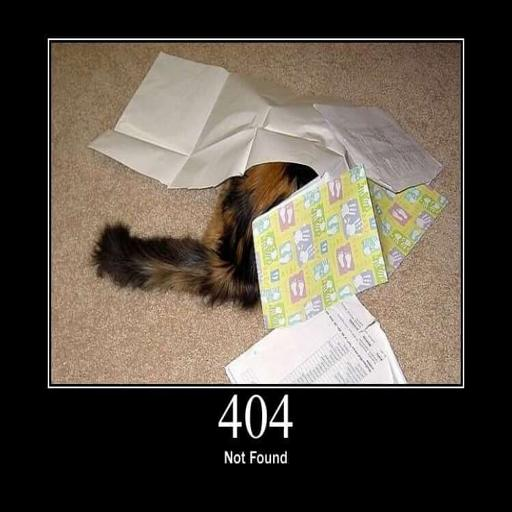
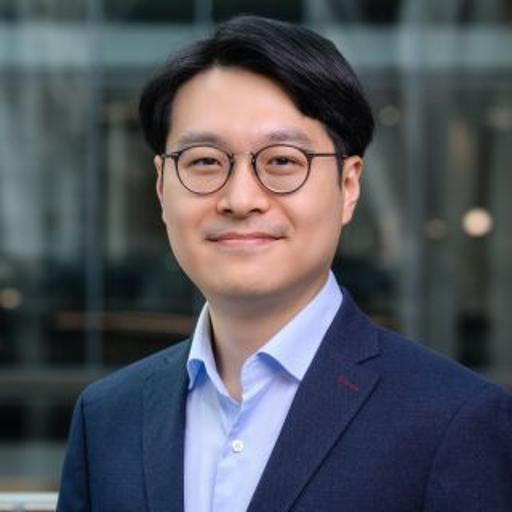

In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from src.flow.chat_process import ChatProcess

chat_process = ChatProcess("Answer the user's questions", 'gemini_1.5_flash',None)
print(chat_process.run({
    "prompt" : "What is in these images?",
    "attachments" : ["404.jpg" , "donghwan.jpg"],
    "append" : True
}))
print(chat_process.runner.chat)




In [3]:
print(chat_process.run({
    "prompt" : "What subject do you think the man teaches?",
}))

content="It's impossible to tell what subject the man in the image teaches based solely on a photograph.  The picture provides no information about his profession beyond suggesting he may work in a professional, possibly corporate setting.  He could be a professor, a business executive, a consultant, or hold any number of other positions." additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-632a68ce-53e6-4d82-b93a-ddc2f9686e94-0' usage_metadata={'input_tokens': 703, 'output_tokens': 65, 'total_tokens': 768, 'input_token_details': {'cache_read': 0}}


In [ ]:
from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

# Load PDF

pages = convert_from_path("Norfolk_Public_Review_PR_RFI_Launch__Template_V2_.pdf") 



# Access and save the first page image

first_page_image = pages[0]

first_page_image.save("extracted_image.jpg") 

In [1]:
import fitz  # PyMuPDF

# Open PDF file
pdf = fitz.open("Norfolk_Public_Review_PR_RFI_Launch__Template_V2_.pdf")

# Iterate through pages and extract images
image_count = 0
for page_num in range(len(pdf)):
    page = pdf[page_num]
    image_list = page.get_images()
    
    for img_index, img in enumerate(image_list):
        xref = img[0]
        base_image = pdf.extract_image(xref)
        image_bytes = base_image["image"]
        
        # Save the image
        with open(f"output_image_{page_num}_{img_index}.png", "wb") as image_file:
            image_file.write(image_bytes)
        
        image_count += 1

print(f"Extracted {image_count} images")

Extracted 27 images
